# Calculating u($\rho$, $\phi$, t) Using the Finite Difference Method

The time-dependent diffusion equation can be solved in closed form.  However, it can be a challenge to use an infinite sum etc.  Alternaitvely, there are other methods that can be employed to calculate the temperature at each point on the geometry over time.  One of the methods is called the finite difference method.  This method is based on using the Taylor series expansion of a fuction to calculate each derivative order.

Starting with a fucntion f(x), the Taylor series expansion of this function around a point $x_0$ at a distance of $\pm \Delta x$ from $x_0$
\begin{equation}
\begin{split}
f(x_0 + \Delta x) &= f(x_0) + (\Delta x) \frac{1}{1!} \frac{df(x_0)}{dx} + \frac{1}{2!}(\Delta x)^2 \frac{d^2f(x_0)}{dx^2} + \frac{1}{3!} (\Delta x)^3 \frac{d^3f(x_0)}{dx^3} + \frac{1}{4!} (\Delta x)^4 \frac{d^4f(x_0)}{dx^4} + \cdots \\
f(x_0 - \Delta x) &= f(x_0) + (-\Delta x) \frac{1}{1!} \frac{df(x_0)}{dx} + \frac{1}{2!}(-\Delta x)^2 \frac{d^2f(x_0)}{dx^2} + \frac{1}{3!} (-\Delta x)^3 \frac{d^3f(x_0)}{dx^3} + \frac{1}{4!} (-\Delta x)^4 \frac{d^4f(x_0)}{dx^4} + \cdots \\
&= f(x_0) - (\Delta x) \frac{1}{1!} \frac{df(x_0)}{dx} + \frac{1}{2!}(\Delta x)^2 \frac{d^2f(x_0)}{dx^2} - \frac{1}{3!} (\Delta x)^3 \frac{d^3f(x_0)}{dx^3} + \frac{1}{4!} (\Delta x)^4 \frac{d^4f(x_0)}{dx^4} + \cdots 
\end{split}
\end{equation}

The diffusion equation requires that the first and second-order derivatives are calculated.  
\begin{equation}
\nabla^2 u (a \hat {e_1}, b \hat {e_2}, c \hat {e_3}, t)   = \frac {\partial u}{\partial t}
\end{equation}
In rectilinear coordinates:
\begin{equation}
\frac {\partial^2 u}{\partial x^2} + \frac {\partial^2 u}{\partial y^2} = \frac {\partial u}{\partial t}
\end{equation}

and in cyclindrical coordinates:
\begin{equation}
\frac {\partial^2 u}{\partial \rho^2} + \frac{1}{\rho} \frac {\partial u}{\partial \rho} + 
\frac{1}{\rho^2} \frac {\partial^2 u}{\partial \phi^2} = \frac {\partial u}{\partial t}
\end{equation}

The approximation for the first-order derivative can be found by taking the difference $f(x_0 + \Delta x) - f(x_0 - \Delta x)$
\begin{equation}
\begin{split} 
f(x_0 + \Delta x) - f(x_0 - \Delta x) &= \left[f(x_0) + (\Delta x) \frac{df(x_0)}{dx} + \frac{1}{2!}(\Delta x)^2 \frac{d^2f(x_0)}{dx^2} + \frac{1}{3!} (\Delta x)^3 \frac{d^3f(x_0)}{dx^3} + \frac{1}{4!} (\Delta x)^4 \frac{d^4f(x_0)}{dx^4} + \cdots \right] - \left[ f(x_0) - (\Delta x) \frac{df(x_0)}{dx} + \frac{1}{2!}(\Delta x)^2 \frac{d^2f(x_0)}{dx^2} - \frac{1}{3!} (\Delta x)^3 \frac{d^3f(x_0)}{dx^3} + \frac{1}{4!} (\Delta x)^4 \frac{d^4f(x_0)}{dx^4} + \cdots \right] \\
&= 2 (\Delta x) \frac{df(x_0)}{dx} + \frac{2 (\Delta x)^3}{3!} \frac{d^3f(x_0)}{dx^3} + \cdots \\
&= 2 (\Delta x) \frac{df(x_0)}{dx} + \frac{(\Delta x)^3}{3} \frac{d^3f(x_0)}{dx^3} + \cdots 
\text{odd terms}
\end{split}
\end{equation}

If we assume that $\Delta x \ll 1$, then we can assume that $(\Delta x)^3 \ll 1$ and subsequent terms can be ignored.  Having said that, we will need to keep in mind that since we are approximating the value of the derivative, there will be error terms to consider to ensure that the final numerical solution is guaranteed to converge.  More on this later.
\begin{equation}
\begin{split} 
f(x_0 + \Delta x) - f(x_0 - \Delta x) &= 2 (\Delta x) \frac{df(x_0)}{dx} + O((\Delta x)^3) \\
\frac{f(x_0 + \Delta x) - f(x_0 - \Delta x)}{2} &= (\Delta x) \frac{df(x_0)}{dx} + O((\Delta x)^3)  \\
\frac{f(x_0 + \Delta x) - f(x_0 - \Delta x)}{2} &\approx (\Delta x) \frac{df(x_0)}{dx} \\
\frac{df(x_0)}{dx} &\approx \frac{f(x_0 + \Delta x) - f(x_0 - \Delta x)}{2 (\Delta x)}
\end{split}
\end{equation}

The approximation for the second-order derivative can be found by taking the sum $f(x_0 + \Delta x) + f(x_0 - \Delta x)$
\begin{equation}
\begin{split} 
f(x_0 + \Delta x) + f(x_0 - \Delta x) &= \left[f(x_0) + (\Delta x) \frac{df(x_0)}{dx} + \frac{1}{2!}(\Delta x)^2 \frac{d^2f(x_0)}{dx^2} + \frac{1}{3!} (\Delta x)^3 \frac{d^3f(x_0)}{dx^3} + \frac{1}{4!} (\Delta x)^4 \frac{d^4f(x_0)}{dx^4} + \cdots \right] + \left[ f(x_0) - (\Delta x) \frac{df(x_0)}{dx} + \frac{1}{2!}(\Delta x)^2 \frac{d^2f(x_0)}{dx^2} - \frac{1}{3!} (\Delta x)^3 \frac{d^3f(x_0)}{dx^3} + \frac{1}{4!} (\Delta x)^4 \frac{d^4f(x_0)}{dx^4} + \cdots \right] \\
&= 2 f(x_0) + 2 (\frac{\Delta x^2}{2!}) \frac{d^2f(x_0)}{dx^2} + 2 (\frac{\Delta x^4}{4!}) \frac{d^4f(x_0)}{dx^4} + \cdots \text{even terms}
\end{split}
\end{equation}

Imposing the assumption that $\Delta x \ll 1$, then we can assume that $(\Delta x)^2 \ll 1$ and subsequent terms can be ignored.  
\begin{equation}
\begin{split} 
f(x_0 + \Delta x) + f(x_0 - \Delta x) &= 2 f(x_0) + 2 (\frac{(\Delta x)^2}{2}) \frac{d^2f(x_0)}{dx^2} + O({\Delta x^4}) \\
f(x_0 + \Delta x) + f(x_0 - \Delta x) &\approx 2 f(x_0) + 2 (\frac{(\Delta x)^2}{2}) \frac{d^2f(x_0)}{dx^2} \\
f(x_0 + \Delta x) + f(x_0 - \Delta x) - 2 f(x_0) &\approx (\Delta x)^2 \frac{d^2f(x_0)}{dx^2} \\
\Delta x^2 \frac{d^2f(x_0)}{dx^2} &\approx f(x_0 + \Delta x) + f(x_0 - \Delta x) - 2 f(x_0)  \\
\frac{d^2f(x_0)}{dx^2} &\approx \frac{f(x_0 + \Delta x) + f(x_0 - \Delta x) - 2 f(x_0)}{(\Delta x)^2}
\end{split}
\end{equation}

The next question is how do we use these results to calculate the temperature U at each point on the surface for each point in time.  Since we have the relationship to approximate the first-order and the second-order derivative, we will need a way to distinguish each coordinate value and time.  Since this is step is arbitrary, we will set the index i to represent the first coordinate (x or $\rho$), j to represent the second coordinate (y or $\phi$) and m represent some time increment.


In rectilinear coordinates:

A surface with sides X and Y and a time interval of T.
The side X is divided into P segments, Y is divided into Q segments and the total time interval T is divided into R intervals:
\begin{equation}
\begin{split} 
\Delta x &= \frac{X}{P} \\
\Delta y &= \frac{Y}{Q} \\
\Delta t &= \frac{T}{R}
\end{split}
\end{equation}

and
\begin{equation}
\begin{split} 
i \in \{0, 1, 2, \cdots, P - 1 \} \\
j \in \{0, 1, 2, \cdots, Q - 1 \} \\
m \in \{0, 1, 2, \cdots, R - 1 \}
\end{split}
\end{equation}

\begin{equation}
\begin{split} 
u(x, y, t) &= u_{i,j}^m \\
u(x + \Delta x, y, t) &= u_{i + 1 ,j}^m \\
u(x - \Delta x, y, t) &= u_{i - 1 ,j}^m \\
u(x, y + \Delta y, t) &= u_{i,j + 1}^m \\
u(x, y - \Delta y, t) &= u_{i,j - 1}^m \\
u(x, y, t + \Delta t) &= u_{i,j}^{m + 1} \\
u(x, y, t - \Delta t) &= u_{i,j}^{m - 1} 
\end{split}
\end{equation}

In cylindrical coordinates:
A surface with radius $\rho$, angular coordinate $\phi$ and a time interval of T.
The radius $\rho$ is divided into P segments, $\phi$ is divided into Q segments and the total time interval T is divided into R intervals:
\begin{equation}
\begin{split} 
\Delta \rho &= \frac{\rho}{P} \\
\Delta \phi &= \frac{\phi}{Q} \\
\Delta t &= \frac{T}{R}
\end{split}
\end{equation}

and
\begin{equation}
\begin{split} 
i \in \{0, 1, 2, \cdots, P - 1 \} \\
j \in \{0, 1, 2, \cdots, Q - 1 \} \\
m \in \{0, 1, 2, \cdots, R - 1 \}
\end{split}
\end{equation}


\begin{equation}
\begin{split} 
u(\rho, \phi, t) &= u_{i,j}^m \\
u(\rho + \Delta \rho, \phi, t)  &= u_{i + 1 ,j}^m \\
u(\rho - \Delta \rho, \phi, t) &= u_{i - 1 ,j}^m \\
u(\rho, y + \Delta \phi, t) &= u_{i,j + 1}^m \\
u(\rho, y - \Delta \phi, t) &= u_{i,j - 1}^m \\
u(\rho, y, t + \Delta t) &= u_{i,j}^{m + 1} \\
u(\rho, y, t - \Delta t) &= u_{i,j}^{m - 1} 
\end{split}
\end{equation}



## Numerical Solution in Rectilinear Coordinates

Recall the PDE for a 2-dimensional rectilinear surface:
\begin{equation}
\frac {\partial^2 u}{\partial x^2} + \frac {\partial^2 u}{\partial y^2} = \frac {\partial u}{\partial t}
\end{equation}

Combinine equations xx and yy, the finite difference method generates the following terms to replace the partial derivatives:
\begin{equation}
\begin{split} 
\frac{df}{dt} &\approx \frac{f(x, y, t + \Delta t) - f(x, y, t - \Delta t)}{2 (\Delta t)} \\
&= \frac{u_{i,j}^{m + 1} - u_{i,j}^{m - 1}}{2 (\Delta t)} \\
\frac{d^2f}{dx^2} &\approx \frac{f(x + \Delta x, y, t) + f(x - \Delta x, y, t) - 2 f(x, y, t)}{(\Delta x)^2} \\
&= \frac{u_{i + 1 ,j}^m + u_{i - 1 ,j}^m - 2 u_{i,j}^m}{(\Delta x)^2} \\
\frac{d^2f}{dy^2} &\approx \frac{f(x, y + \Delta y, t) + f(x, y - \Delta y, t) - 2 f(x, y, t)}{(\Delta y)^2} \\
&= \frac{u_{i,j + 1}^m + u_{i,j - 1}^m - 2 u_{i,j}^m}{(\Delta y)^2}  
\end{split} 
\end{equation}

And the PDE becomes
\begin{equation}
\frac {\partial^2 u}{\partial x^2} + \frac {\partial^2 u}{\partial y^2} = \frac {\partial u}{\partial t} \\
\frac{u_{i + 1 ,j}^m + u_{i - 1 ,j}^m - 2 u_{i,j}^m}{(\Delta x)^2} + \frac{u_{i,j + 1}^m + u_{i,j - 1}^m - 2 u_{i,j}^m}{(\Delta y)^2} = \frac{u_{i,j}^{m + 1} - u_{i,j}^{m - 1}}{2 (\Delta t)} 
\end{equation}

The $\Delta x$ and $\Delta y$ terms are going to be small, but not too small to ensure that amount of time and memory needed to perform the calculation is optimized.  For now, we will assume that $\Delta x$ = $\Delta y$. 
\begin{equation}
\begin{split} 
\frac{u_{i + 1 ,j}^m + u_{i - 1 ,j}^m - 2 u_{i, j}^m}{(\Delta x)^2} + \frac{u_{i,j + 1}^m + u_{i,j - 1}^m - 2 u_{i,j}^m}{(\Delta y)^2} &= \frac{u_{i,j}^{m + 1} - u_{i,j}^{m - 1}}{2 (\Delta t)} \\
\frac{u_{i + 1 ,j}^m + u_{i - 1 ,j}^m - 2 u_{i, j}^m}{(\Delta x)^2} + \frac{u_{i,j + 1}^m + u_{i,j - 1}^m - 2 u_{i,j}^m}{(\Delta x)^2} &= \frac{u_{i,j}^{m + 1} - u_{i,j}^{m - 1}}{2 (\Delta t)} \\
\frac{u_{i + 1 ,j}^m + u_{i - 1 ,j}^m - 2 u_{i, j}^m + u_{i,j + 1}^m + u_{i,j - 1}^m - 2 u_{i,j}^m}{(\Delta x)^2} &= \frac{u_{i,j}^{m + 1} - u_{i,j}^{m - 1}}{2 \Delta t} \\
\frac{u_{i + 1 ,j}^m + u_{i - 1 ,j}^m + u_{i,j + 1}^m + u_{i,j - 1}^m - 4 u_{i,j}^m}{(\Delta x)^2} &= \frac{u_{i,j}^{m + 1} - u_{i,j}^{m - 1}}{2 \Delta t} \\
\frac{(2 \Delta t)}{(\Delta x)^2}(u_{i + 1 ,j}^m + u_{i - 1 ,j}^m + u_{i,j + 1}^m + u_{i,j - 1}^m - 4 u_{i,j}^m) + u_{i,j}^{m - 1} &= u_{i,j}^{m + 1}
\end{split}
\end{equation}


## Numerical Solution in Cylindrical Coordinates

Recall the PDE for a 2-dimensional cylindrical surface:
\begin{equation}
\begin{split}
\frac {\partial^2 u}{\partial \rho^2} + \frac{1}{\rho} \frac {\partial u}{\partial \rho} + 
\frac{1}{\rho^2} \frac {\partial^2 u}{\partial \phi^2} = \frac {\partial u}{\partial t}
\end{split}
\end{equation}

Combinine equations xx and yy, the finite difference method generates the following terms to replace the partial derivatives:
\begin{equation}
\begin{split} 
\frac{df}{dt} &\approx \frac{f(\rho, \phi, t + \Delta t) - f(\rho, \phi, t - \Delta t)}{2 (\Delta t)} \\
&= \frac{u_{i,j}^{m + 1} - u_{i,j}^{m - 1}}{2 (\Delta t)} \\
\frac{df}{d\rho} &\approx \frac{f(\rho +\Delta \rho, \phi, t) - f(\rho - \Delta \rho, \phi, t )}{2 (\Delta \rho)} \\
&= \frac{u_{i + 1,j}^{m} - u_{i -1 ,j}^{m}}{2 (\Delta \rho)} \\
\frac{d^2f}{d\rho^2} &\approx \frac{f(\rho + \Delta \rho, \phi, t) + f(\rho - \Delta \rho, \phi, t) - 2 f(\rho, \phi, t)}{(\Delta \rho)^2} \\
&= \frac{u_{i + 1 ,j}^m + u_{i - 1 ,j}^m - 2 u_{i,j}^m}{(\Delta \rho)^2} \\
\frac{d^2f}{d\phi^2} &\approx \frac{f(\rho, \phi + \Delta, t) + f(\rho, \phi - \Delta \phi, t) - 2 f(\rho, \phi, t)}{(\Delta \phi)^2} \\
&= \frac{u_{i,j + 1}^m + u_{i,j - 1}^m - 2 u_{i,j}^m}{(\Delta \phi)^2}  
\end{split} 
\end{equation}

Since the coordinate $\rho$ is discretized, it get replaced by $\rho_i$ since we have to us the value of $\rho$ at each point in the mesh.
And the PDE becomes
\begin{equation}
\frac {\partial^2 u}{\partial \rho^2} + \frac{1}{\rho} \frac {\partial u}{\partial \rho} + 
\frac{1}{\rho^2} \frac {\partial^2 u}{\partial \phi^2} = \frac {\partial u}{\partial t} \\
\frac{u_{i + 1 ,j}^m + u_{i - 1 ,j}^m - 2 u_{i,j}^m}{(\Delta \rho)^2} + 
\frac{1}{\rho_i} \frac{u_{i + 1,j}^{m} - u_{i -1 ,j}^{m}}{2 (\Delta \rho)} +
\frac{1}{(\rho_i)^2} \frac{u_{i,j + 1}^m + u_{i,j - 1}^m - 2 u_{i,j}^m}{(\Delta \phi)^2}  = \frac{u_{i,j}^{m + 1} - u_{i,j}^{m - 1}}{2 (\Delta t)} \\
2 (\Delta t) \left[\frac{u_{i + 1 ,j}^m + u_{i - 1 ,j}^m - 2 u_{i,j}^m}{(\Delta \rho)^2} + 
\frac{1}{\rho_i} \frac{u_{i + 1,j}^{m} - u_{i -1 ,j}^{m}}{2 (\Delta \rho)} +
\frac{1}{(\rho_i)^2} \frac{u_{i,j + 1}^m + u_{i,j - 1}^m - 2 u_{i,j}^m}{(\Delta \phi)^2} \right] = u_{i,j}^{m + 1} - u_{i,j}^{m - 1} \\
2 (\Delta t) \left[\frac{u_{i + 1 ,j}^m + u_{i - 1 ,j}^m - 2 u_{i,j}^m}{(\Delta \rho)^2} + 
\frac{1}{\rho_i} \frac{u_{i + 1,j}^{m} - u_{i -1 ,j}^{m}}{2 (\Delta \rho)} +
\frac{1}{(\rho_i)^2} \frac{u_{i,j + 1}^m + u_{i,j - 1}^m - 2 u_{i,j}^m}{(\Delta \phi)^2} \right] +  u_{i,j}^{m - 1} = u_{i,j}^{m + 1}
\end{equation}

<IPython.core.display.Javascript object>


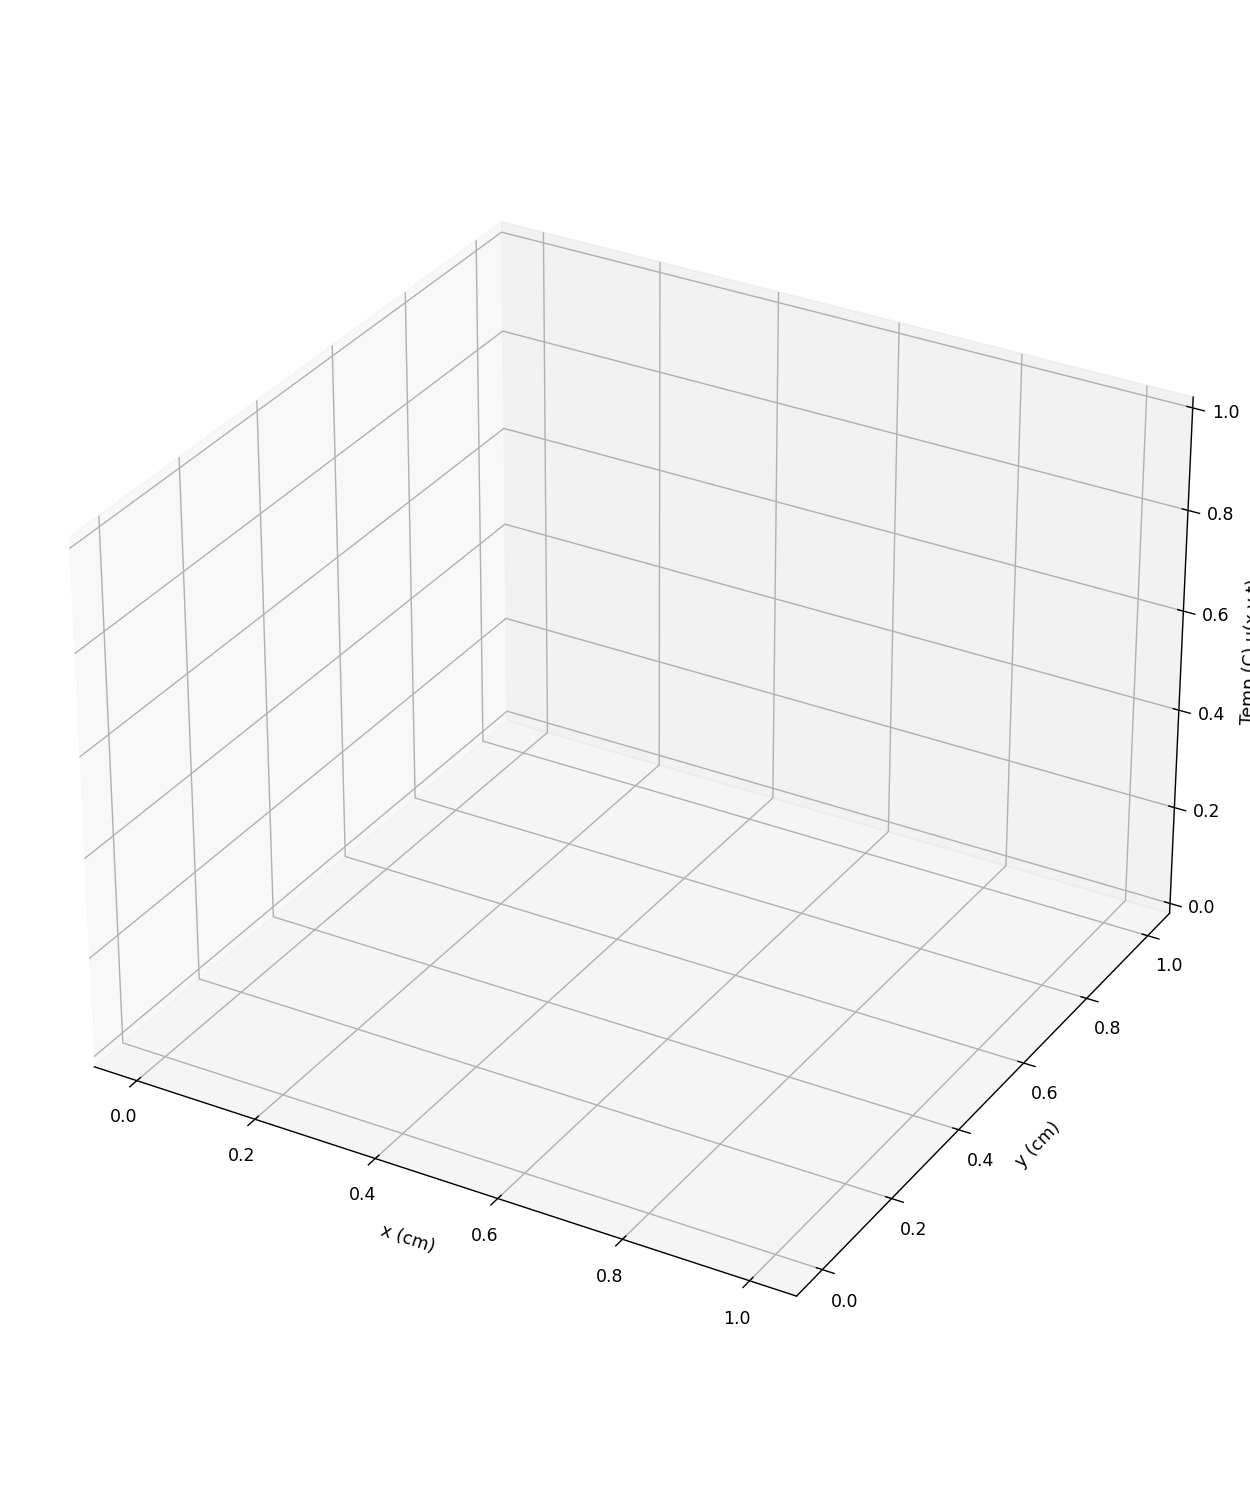

TypeError: text() missing 1 required positional argument: 's'

In [14]:
# Filename:  Plot2DHeat.py
# Purpose:   
#
%matplotlib notebook

# imports
import      sys
import      matplotlib.pyplot as plt
import      matplotlib.animation as animation
from        matplotlib import cm
from        matplotlib.ticker import LinearLocator, FormatStrFormatter
import      matplotlib
import      plotly as pl
import      numpy as np
from        mpl_toolkits.mplot3d import Axes3D
#from        matplotlib.animation import FuncAnimation
from        IPython.display import HTML

class HeatOnRectangle():
    def __init__(self, xmax= 100, ymax= 100, tmax=10, dx = 0.1, dy= 0.1, dt=0.01, frames=50, bDebug = False):
        #Global debug
        self.bDebug = bDebug
        
        #Init physical grid for calculation
        self.dt = dt
        self.dx = dx
        self.dy = dy
        self.Tmax = tmax
        self.Xmax = xmax
        self.Ymax = ymax
        self.frames = frames
        
        self.t = np.linspace(0, tmax, 1)
        self.x = np.linspace(0, xmax, xmax+1)
        self.y = np.linspace(0, ymax, ymax+1)   
        self.u = np.zeros([len(self.x), len(self.y)], float)
        self.uAnimation = np.zeros([len(self.x), len(self.y), self.frames + 1], float)
        
        #init graphical output
        self.fig = plt.figure()                                 # Create figure object
        self.fig.set_size_inches(10, 12)
        
        self.ax = Axes3D(self.fig, auto_add_to_figure=False)    # Create axes object
        self.fig.add_axes(self.ax)
        self.surf, = plt.plot([], [], [])                       # Create empty 3D line object
        self.ax.set_xlabel("x (cm)")
        self.ax.set_ylabel("y (cm)")
        self.ax.set_zlabel("Temp (C) u(x,y,t)")      
        self.X_ax, self.Y_ax = np.meshgrid(self.x,self.y)
        self.ax.text(5,10,'Title')
        
    # end of __init__
    
    def __str__(self):
        
        print ("u = %d".format(u))    
    # end of __str__

    def initSurface(self):
        '''
            x and y are lists (vectors) that define the length and width of the rectangle
            
            return an array initialized with zero's
        '''
        if (self.bDebug == True):
            print("In initSurface")
            
        self.u = np.zeros([len(self.x), len(self.y)], float)

        return 

    def applyInitialConditionsAnim(self):
    
        if (self.bDebug == True):
            print("applyInitialConditionsAnim")
        
        #find some grid element near the center
        a = np.int32(np.floor(len(self.x)/2))
        b = np.int32(np.floor(len(self.y)/2))
                
        self.uAnimation[a-10:a+10, b-5:b+20, 0] = 50000.0

        if (self.bDebug == True):
            print (self.uAnimation[a, b, 0])
            print (self.uAnimation)
        
        return 

    def applyBoundaryConditionsAnim(self, t):
        #along the x-axis
        self.uAnimation[:, 0, t] = 0.0
        
        #along the x-axis on the upper-side of the rectangle
        self.uAnimation[:, len(self.y)-1, t] = 0.0
        
        #along the y-axis
        self.uAnimation[0,:,t] = 10000.0
        
        #along the y-axis on the right-side of the rectangle
        self.uAnimation[len(self.x)-1, :, t] = 10000.0

        if (self.bDebug == True):
            print (self.uAnimation)
        
        return
        
    def calcTempNextTimeSegmentAnim(self, t):
        for j in range(1, len(self.x)-1):
            if (self.bDebug == True):
                print ("j = ", j)
            for l in  range(1, len(self.y)-1):
                if (self.bDebug == True):
                    print ("l = ", l)
                self.uAnimation[j,l,t] = (1.0 / 4.0) * (self.uAnimation[j+1,l,t-1] + 
                                            self.uAnimation[j-1,l,t-1] + 
                                            self.uAnimation[j,l+1,t-1] + 
                                            self.uAnimation[j,l-1,t-1]) 

            if (self.bDebug == True):
                print (self.uAnimation)

        return

    def calcDataAnimation(self, tMax):

        #Generate the data throughout the time interval
        for t in range(1, tMax):        
            self.applyBoundaryConditionsAnim(t)
            self.calcTempNextTimeSegmentAnim(t)
        
        return 
    
    def animatePlot(self, nFrame, plot):

        
        self.applyBoundaryConditionsAnim(nFrame)
        self.calcTempNextTimeSegmentAnim(nFrame)
        
        self.ax.clear()
        plot = self.ax.plot_surface(X, Y, self.uAnimation[:,:,nFrame], cmap=cm.coolwarm, linewidth=0, antialiased=False)
        plt.title("Heat distribution on a plane")
        
        return plot,
    
    def calcDataForAnimation(self, nFrame, X, Y, plot):
    
        plot[0].remove()

        plot[0] = self.ax.plot_surface(X, Y, self.uAnimation[:,:,nFrame], cmap=cm.coolwarm, linewidth=0, antialiased=False)

        self.title.set_text("Heat distribution on the plane for time segment {}".format(nFrame))
        
        return 

    def animateSurfacePlot(self, T, X, Y, plot):
        # call the animator.  blit=True means only re-draw the parts that have changed.
        anim = animation.FuncAnimation(self.fig, self.calcDataForAnimation, T, fargs=(X, Y, plot), blit=True)

        # save the animation as an mp4.  This requires ffmpeg or mencoder to be
        # installed.  The extra_args ensure that the x264 codec is used, so that
        # the video can be embedded in html5.  You may need to adjust this for
        # your system: for more information, see
        # http://matplotlib.sourceforge.net/api/animation_api.html
        #anim.save('basic_animation.mp4', fps=30)

        html = HTML(anim.to_html5_video())
        display(html)
        plt.close()
        
        return
    
    def plotSurface(self):

        X, Y = np.meshgrid(self.x,self.y)

        # Plot the surface.
        plot = [self.ax.plot_surface(self.X_ax, self.Y_ax, self.uAnimation[:,:,0], cmap=cm.coolwarm, linewidth=0, antialiased=False)]

        # Add a color bar which maps values to colors.
        cb = self.fig.colorbar(plot[0], shrink=0.5, aspect=5)
        cb.set_label("Temp (C)")
        
        return X, Y, plot,

# end of class HeatOnRectangle

 
# *****
# Python entry point
# *****
if __name__ == "__main__":
    '''
    Process to create an animiated graphic using FuncAnimation (from http://www.acme.byu.edu/wp-content/uploads/2018/09/Animation.pdf)
    1. Compute all data to be plotted.
    2. Explicitly define figure object.
    3. Define line objects to be altered dynamically.
    4. Create function to update line objects.
    5. Create FuncAnimation object.
    6. Display using plt.show().

    Approach from the following sources:
    https://stackoverflow.com/questions/45712099/updating-z-data-on-a-surface-plot-in-matplotlib-animation
    https://pythonmatplotlibtips.blogspot.com/2018/11/animation-3d-surface-plot-artistanimation-matplotlib.html
    '''
    s = -0.20
    T = 100
    N = 100
    L = 100
    Nx = 100
    Ny = 100
    Nt = 100
    dt = T/Nt
    dx = N/Nx
    dy = L/Ny    
    debug = False
    matplotlib.matplotlib_fname()

    #1. Compute all data to be plotted.
    #2. Explicitly define figure object.
    r = HeatOnRectangle(N, L, T, dx, dy, dt, T, debug)
    r.applyInitialConditionsAnim()
    r.calcDataAnimation(T)

    X, Y, plot = r.plotSurface()
    r.animateSurfacePlot(T, X, Y, plot )
    
    print ("Done!")    
